In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use the correct path to where you saved the foodtruck data file
data = pd.read_csv('foodtruck_profits.txt', delimiter=',', header=None).values
print("Data shape: {}".format(data.shape))
print('The first few lines of data: {}'.format(data[0:5,:]))

Data shape: (100, 2)
The first few lines of data: [[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


In [2]:
# add a variable and find the length of the data
m = len(data)

# we change the one-dimensional data into a matrix form 
X = np.matrix(data[:,0]).T
y = np.matrix(data[:,1]).T

print("Number of examples: {}".format(m))
print("Shape of data     : {}".format(X.shape))
print("Shape of labels   : {}".format(y.shape))

Number of examples: 100
Shape of data     : (100, 1)
Shape of labels   : (100, 1)


In [3]:
# add intercept term to data X
X = np.c_[np.ones(m), X] #np.c_ helps in appending columns

print("New shape of data: {}".format(X.shape))

New shape of data: (100, 2)


In [4]:

# Closed form solution

#Compute inverse of (Xtranspose * X)
temp1 = np.linalg.pinv(np.dot(X.T,X))

#Computer Xtranspose * y
temp2 = np.dot(X.T,y)

W = np.dot(temp1,temp2)
print (W.shape)

print (W)

(2, 1)
[[-3.95911545]
 [ 1.19673809]]


Text(0, 0.5, 'Profit in 10,000s')

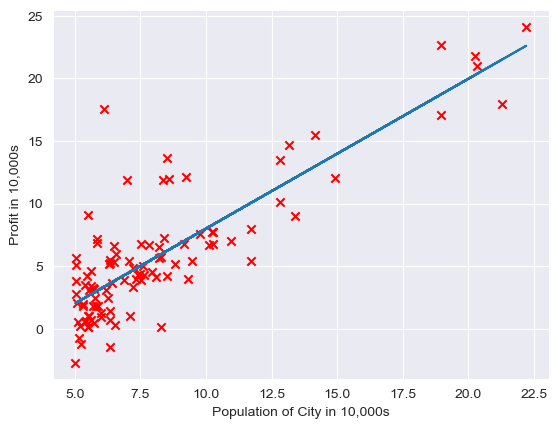

In [5]:
plt.scatter(data[:,0],data[:,1], color="red", marker="x",)
plt.plot(X[:,1], np.dot(X,W)) #regression line

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in 10,000s')

In [6]:
# 17.5 x 10,000 = 175,000 population so we use x = 17.5
predicted_profit = np.dot([1,17.5], W)
# Predicted profit needs to be multiplied by y units, 10,000, and rounded to be currency
print ("Start by finding the y value at x = 17.5: {}".format(predicted_profit))
# multiply by 10,000 because that's the y unit
multiplied_profit = predicted_profit * 10000           
# round to two decimal places so it looks like money
final_profit = np.around(multiplied_profit, decimals = 2)
print ("For a population of 175,000, we predict a profit of: {}".format(final_profit))

Start by finding the y value at x = 17.5: [[16.98380112]]
For a population of 175,000, we predict a profit of: [[169838.01]]


# Multivariate regression


In [8]:
dataframe = pd.read_excel("data.xlsx")

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:,0:-1], dataframe.iloc[:,-1], test_size=0.33, random_state=42)
print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (514, 8)
Test shape:  (254, 8)


In [12]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


# Linear regression model from sci-kit learn


In [18]:
from sklearn.linear_model import LinearRegression
dataset = pd.read_csv("Advertising.csv")

my_model = LinearRegression()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataframe.iloc[:,0:-1], dataframe.iloc[:,-1], test_size=0.33, random_state=42)


#fit the model using our data
my_model.fit(Xtrain, Ytrain)


LinearRegression()

In [19]:
print(Xtrain)
print(Ytrain)

       X1     X2     X3      X4   X5  X6    X7  X8
464  0.69  735.0  294.0  220.50  3.5   2  0.25   4
223  0.71  710.5  269.5  220.50  3.5   5  0.10   4
393  0.86  588.0  294.0  147.00  7.0   3  0.25   3
766  0.62  808.5  367.5  220.50  3.5   4  0.40   5
570  0.64  784.0  343.0  220.50  3.5   4  0.40   1
..    ...    ...    ...     ...  ...  ..   ...  ..
71   0.76  661.5  416.5  122.50  7.0   5  0.10   1
106  0.86  588.0  294.0  147.00  7.0   4  0.10   2
270  0.71  710.5  269.5  220.50  3.5   4  0.10   5
435  0.98  514.5  294.0  110.25  7.0   5  0.25   4
102  0.90  563.5  318.5  122.50  7.0   4  0.10   2

[514 rows x 8 columns]
464    12.91
223    10.72
393    29.40
766    16.48
570    19.48
       ...  
71     32.21
106    26.33
270    10.67
435    28.62
102    28.83
Name: Y1, Length: 514, dtype: float64


In [22]:
ypredicts = my_model.predict(Xtest)

print("The predicted Y1:")
print(ypredicts)
print("The true Y1:")
print(Ytest)

The predicted Y1:
[18.74885902 13.94728204 31.15470485 35.81086938 15.32199718 28.68696905
 24.92235979 27.93791033 17.57929412 27.5835785  17.93027486 34.30117346
 27.68180805  8.68883006 18.59029892 36.75971437 37.46646076 11.40012218
 15.20704532 34.24966624 34.36230449 35.15563021 10.88022428 29.98579717
 12.61070506 29.93428996 33.20740673 34.20778284 14.61525079 15.63029404
  7.98208367 10.79160534 15.06924598 30.89275876 29.07302191 27.83489589
 30.74743199 29.12452913 33.15589951  8.92319303 28.5931495  11.4516294
  6.69441295 32.27223596  7.41388892  6.64290573  8.59993698  8.97470025
 28.80269023 30.89860257 33.46015793 14.95828685 14.04551159 32.79531884
 12.84673395 12.30644664 10.89461978 31.80074914 40.2292601  37.01246558
 16.53025324 19.25436142 14.8037652  28.83670581 28.54164228 29.83127552
 29.88278274 10.98323872 12.91900192 11.14737098 26.97506166 31.66020726
 13.66922435 28.12995943 32.01948476 10.84311256 34.76479246 31.39826117
 30.64920245 23.66137405 25.479369